In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

#### Step 0: Prepare data

In [2]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X_train = torch.from_numpy(X_numpy.astype(np.float32))
y_train = torch.from_numpy(y_numpy.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)

n_samples, n_features = X_train.shape

#### Step 1: Construct the model

In [3]:
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

#### Step 2: Loss and Optimizer

In [4]:
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#### Step 3: Training loop

In [5]:
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass: get prediction
    y_pred = model(X_train)

    # calculate loss
    loss = criterion(y_pred, y_train)

    # backward pass: calculate gradients
    loss.backward()

    # optimize the params
    optimizer.step()

    # reset the gradients for next epoch
    optimizer.zero_grad()

    # print the params
    [w, b] = model.parameters()
    print(f"epoch {epoch + 1}: w = {w[0][0].item():.3f}, loss = {loss.item():.5f}")

epoch 1: w = 1.665, loss = 5685.05127
epoch 2: w = 2.942, loss = 5515.47559
epoch 3: w = 4.198, loss = 5351.32080
epoch 4: w = 5.434, loss = 5192.41309
epoch 5: w = 6.650, loss = 5038.58203
epoch 6: w = 7.847, loss = 4889.66455
epoch 7: w = 9.025, loss = 4745.50000
epoch 8: w = 10.184, loss = 4605.93701
epoch 9: w = 11.325, loss = 4470.82617
epoch 10: w = 12.448, loss = 4340.02490
epoch 11: w = 13.553, loss = 4213.39307
epoch 12: w = 14.640, loss = 4090.79688
epoch 13: w = 15.710, loss = 3972.10718
epoch 14: w = 16.763, loss = 3857.19727
epoch 15: w = 17.800, loss = 3745.94531
epoch 16: w = 18.820, loss = 3638.23438
epoch 17: w = 19.823, loss = 3533.95020
epoch 18: w = 20.811, loss = 3432.98340
epoch 19: w = 21.783, loss = 3335.22656
epoch 20: w = 22.740, loss = 3240.57690
epoch 21: w = 23.682, loss = 3148.93457
epoch 22: w = 24.608, loss = 3060.20337
epoch 23: w = 25.520, loss = 2974.28979
epoch 24: w = 26.418, loss = 2891.10352
epoch 25: w = 27.301, loss = 2810.55688
epoch 26: w = 28

Let's plot the graph

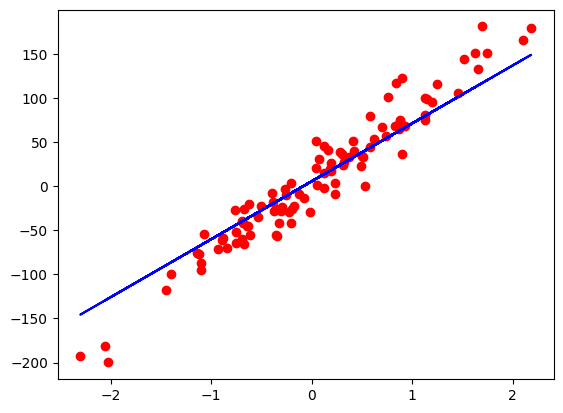

In [6]:
predicted = model(X_train).detach() # don't track on comp. graph
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()